# Financial Inclusion in Africa


Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.
Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


### 1. Import libraries and check data / files

In [97]:
# Importing libraries
# general (pandas, plots etc)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# ML models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection
from sklearn.model_selection import train_test_split

# Performance metrics

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix




In [2]:
# Load data to pandas dataframe
dataset = pd.read_csv('Train.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
# Checking shape of the dataset
print('train data shape :', dataset.shape)

train data shape : (23524, 13)


In [4]:
# view the variables description
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [5]:
# check dataset in pandas
dataset.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# check missing values
print('missing values:', dataset.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [7]:
# check data types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


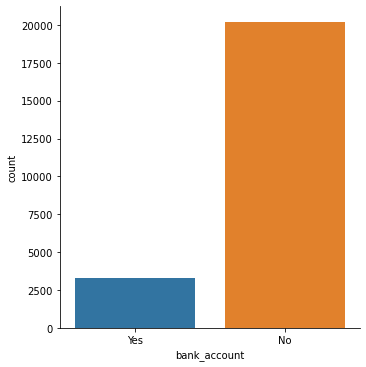

In [8]:
# explore output variable distribution - Bank Account
sns.catplot(x="bank_account", kind="count", data=dataset)

In [9]:
# Calculate the percentage of 'bank_account' occurrences compared to total rows

bank_acc_ttl = LabelEncoder().fit_transform(dataset['bank_account'])
bank_acc_perc = bank_acc_ttl.mean() * 100

print(f"The percentage of 'bank_account' occurrences compared to total rows is: {bank_acc_perc:.2f}%")

The percentage of 'bank_account' occurrences compared to total rows is: 14.08%


### 2. Data exploration

In [10]:
# List columns of the data set

dataset.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

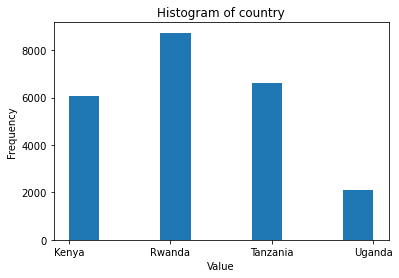

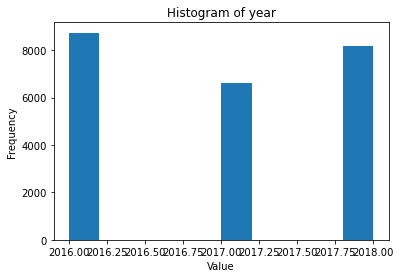

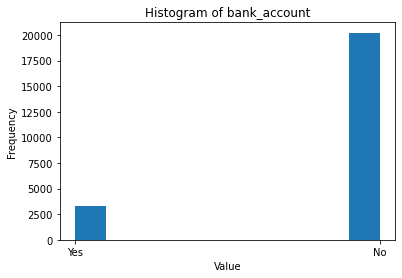

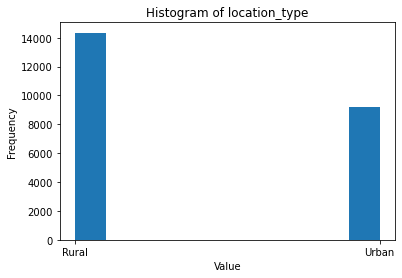

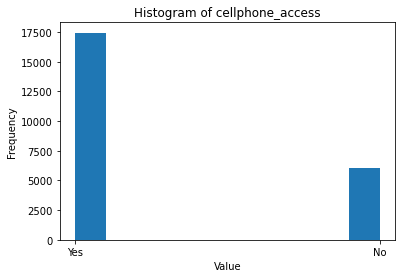

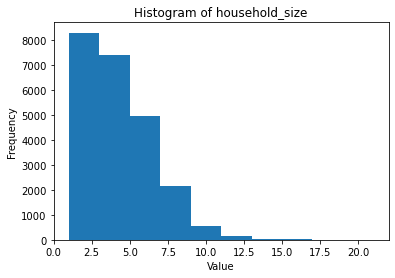

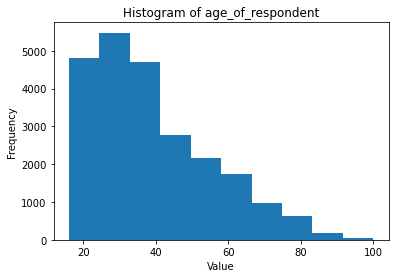

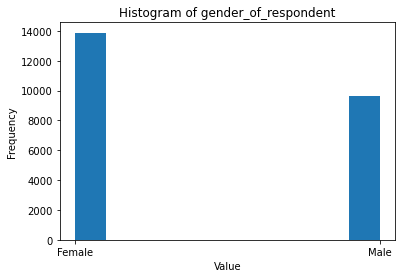

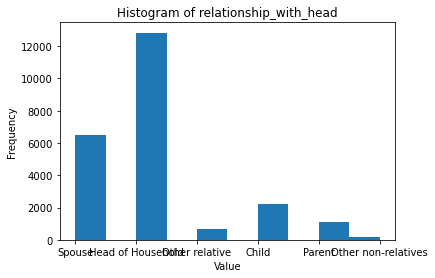

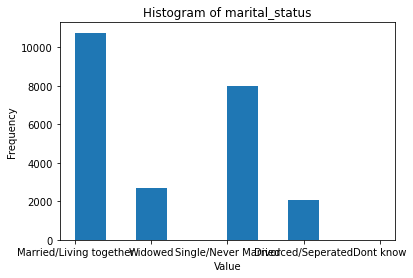

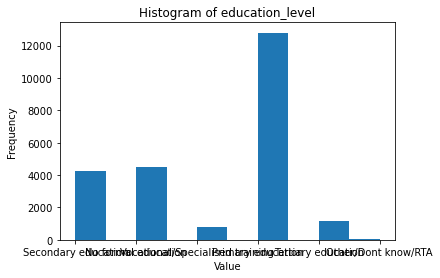

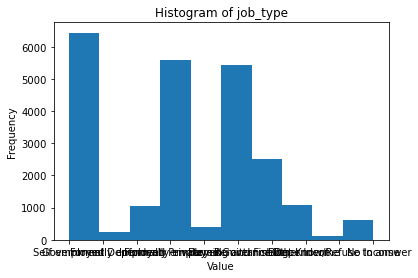

In [11]:
# Plot histograms for all variables except uniqueid
cols = dataset.drop(['uniqueid'], axis=1)

for col in cols:
    plt.hist(dataset[col], bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

<Figure size 576x432 with 0 Axes>

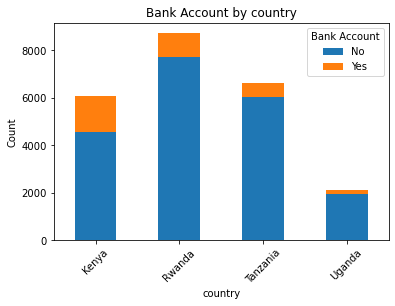

<Figure size 576x432 with 0 Axes>

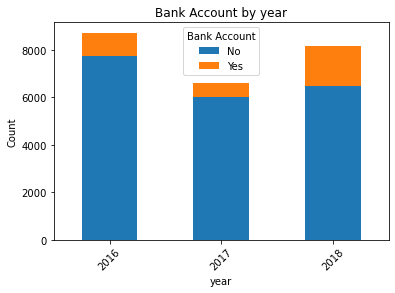

<Figure size 576x432 with 0 Axes>

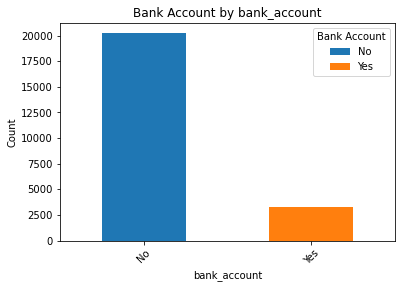

<Figure size 576x432 with 0 Axes>

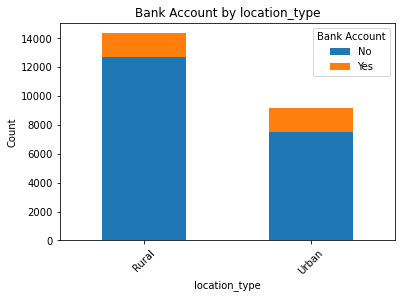

<Figure size 576x432 with 0 Axes>

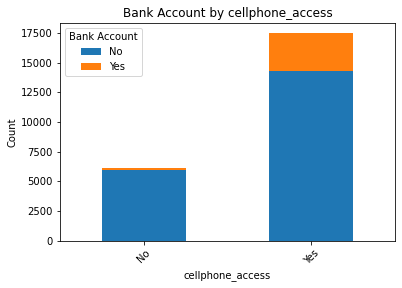

<Figure size 576x432 with 0 Axes>

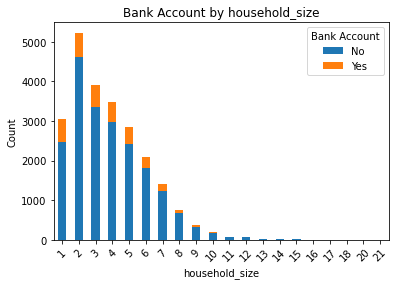

<Figure size 576x432 with 0 Axes>

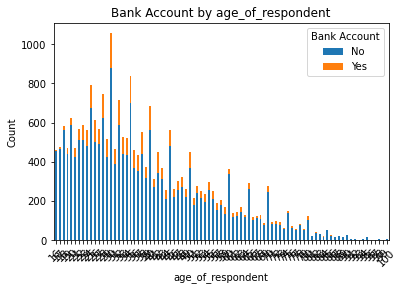

<Figure size 576x432 with 0 Axes>

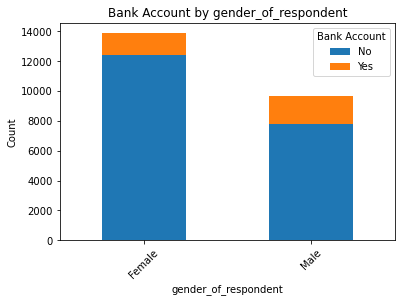

<Figure size 576x432 with 0 Axes>

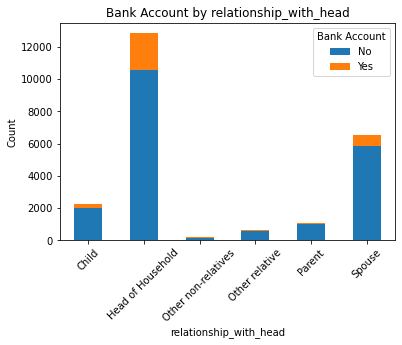

<Figure size 576x432 with 0 Axes>

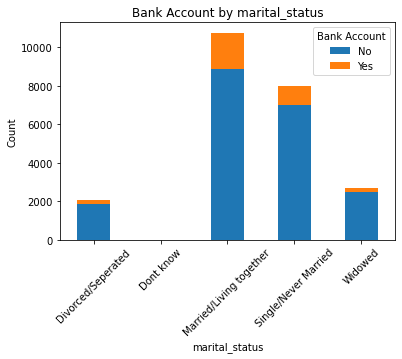

<Figure size 576x432 with 0 Axes>

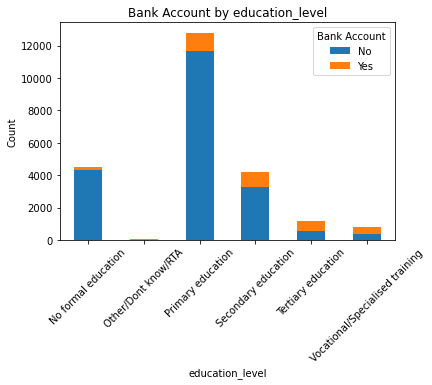

<Figure size 576x432 with 0 Axes>

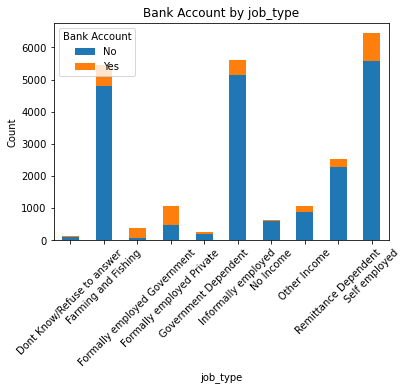

In [12]:
# Explore bank accounts by other features

for column in cols:
    plt.figure(figsize=(8, 6))
    dataset.groupby([column, 'bank_account']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Bank Account by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Bank Account', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

### 3. Data preparation and feature engineering

In [13]:
# Convert label to numerical data (1-yes, 0-no) and check data

le = LabelEncoder()
dataset['bank_account'] = le.fit_transform(dataset['bank_account'])
dataset.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [14]:
# Label Encoder conversion

dataset['location_type'] = le.fit_transform(dataset["location_type"])
dataset['cellphone_access'] = le.fit_transform(dataset["cellphone_access"])
dataset['gender_of_respondent'] = le.fit_transform(dataset["gender_of_respondent"])

In [15]:
dataset

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,0,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,0,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,0,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,0,Parent,Divorced/Seperated,Secondary education,Self employed


In [16]:
#Separate features from label
data_X = dataset.drop(['bank_account'], axis=1)
y = dataset['bank_account']

print(y)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [17]:
data_X.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


In [18]:
# Encode categorical features using panda's get dummies
categ = ["relationship_with_head","marital_status","education_level","job_type","country"]
data_X = pd.get_dummies(data_X, prefix_sep="_", columns=categ)

data_X

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,2018,uniqueid_2114,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,2018,uniqueid_2115,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,uniqueid_2116,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
# Features to be scaled
features_to_scale = ['household_size', 'age_of_respondent']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
df_scaled = data_X.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Display the scaled DataFrame
df_scaled

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,0,1,0.10,0.095238,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,0,0,0.20,0.642857,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,1,1,0.20,0.119048,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,0,1,0.20,0.214286,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,1,0,0.35,0.119048,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,1,0.15,0.380952,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,2018,uniqueid_2114,0,1,0.05,0.130952,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,2018,uniqueid_2115,0,1,0.20,0.130952,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,uniqueid_2116,1,1,0.30,0.166667,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### 4. Feature selection

In [20]:
# Drop uniqueid and set features X
X = df_scaled.drop(['uniqueid'], axis=1)

In [21]:
X

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,0,1,0.10,0.095238,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,0.20,0.642857,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,0.20,0.119048,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,1,0.20,0.214286,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,1,0,0.35,0.119048,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,1,0.15,0.380952,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
23520,2018,0,1,0.05,0.130952,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
23521,2018,0,1,0.20,0.130952,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,1,1,0.30,0.166667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
# Use Chi2 to check correlation
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get scores and corresponding features
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort features by score in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores_sorted)

                                            Feature        Score
26               job_type_Formally employed Private  1398.459048
21               education_level_Tertiary education  1309.442224
25            job_type_Formally employed Government  1287.543695
22  education_level_Vocational/Specialised training  1224.908523
33                                    country_Kenya   605.482163
17              education_level_No formal education   386.875887
19                education_level_Primary education   323.840989
20              education_level_Secondary education   295.349066
2                                  cellphone_access   266.843216
5                              gender_of_respondent   190.722499
28                     job_type_Informally employed   173.777501
7          relationship_with_head_Head of Household   140.201408
35                                 country_Tanzania   131.932939
1                                     location_type   109.282841
14           marital_stat

### 4. Model Building and Experiments

In [62]:
# Selecting top features (score >100)
selected_f=['job_type_Formally employed Private','education_level_Tertiary education','job_type_Formally employed Government','education_level_Vocational/Specialised training','country_Kenya','education_level_No formal education','education_level_Primary education','education_level_Secondary education','cellphone_access','gender_of_respondent','job_type_Informally employed','relationship_with_head_Head of Household','country_Tanzania','location_type']

selected_f2=['job_type_Formally employed Private','education_level_Tertiary education','job_type_Formally employed Government','education_level_Vocational/Specialised training']
X_sel = X[selected_f]
X_sel

#Experimenting with top 4 features (score >1000)
X_sel2 = X[selected_f2]

In [70]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shapes of the resulting sets
print("Shapes of the resulting sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes of the resulting sets:
X_train: (18819, 37)
X_test: (4705, 37)
y_train: (18819,)
y_test: (4705,)


In [71]:
# Initialize the logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg.fit(X_train, y_train)


# Predict on the testing data
y_pred = log_reg.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy of the model
print("Accuracy of Logistic Regression model:", accuracy)

Accuracy of Logistic Regression model: 0.8879914984059512


In [72]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display the accuracy of the Random Forest model
print("Accuracy of Random Forest model:", accuracy_rf)

Accuracy of Random Forest model: 0.8663124335812965


In [76]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Display the accuracy of the XGBoost classifier
print("Accuracy of XGBoost classifier:", accuracy_xgb)

Accuracy of XGBoost classifier: 0.8892667375132838


In [78]:
# Initialize the KNN classifier (set the number of neighbors, k, as desired)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Display the accuracy of the KNN classifier
print("Accuracy of KNN classifier:", accuracy_knn)


Accuracy of KNN classifier: 0.8835281615302869


In [94]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = decision_tree.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Display the accuracy of the Decision Tree classifier
print("Accuracy of Decision Tree classifier:", accuracy_dt)

Accuracy of Decision Tree classifier: 0.8363443145589798


Best performing is XGB model.
Checking the **confusion matrix for XGB model**

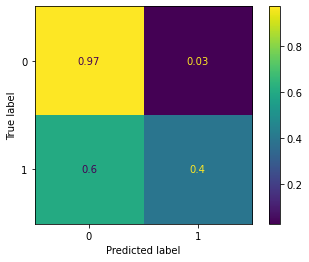

In [86]:
# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xgb_classifier,X_test, y_test,normalize='true')

In [90]:
# Optimize model parameters
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xgb_classifier, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[21:25:55] WARNING: C:\b\abs_7diruzi3as\croot\xgboost-split_1712794727514\work\src\learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}


In [91]:
# fit by setting best parameters and Evaluate model
xgb_model_opt = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=1.0, max_depth=3)

xgb_model_opt.fit(X_train, y_train)
y_pred_opt = xgb_model_opt.predict(X_test)

# Predict on the testing data
y_pred_xgb_opt = xgb_model_opt.predict(X_test)

# Calculate accuracy
accuracy_xgb_opt = accuracy_score(y_test, y_pred_xgb_opt)

# Display the accuracy of the XGBoost classifier
print("Accuracy of XGBoost classifier:", accuracy_xgb_opt)

Accuracy of XGBoost classifier: 0.8894792773645058


XGB model has improved from the previous performance of **0.8893** to **0.8895**.


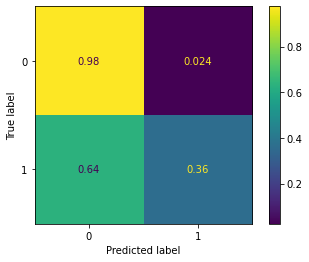

In [92]:
# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xgb_model_opt,X_test, y_test,normalize='true')